## ASSIGNMENT 2 : LINEAR REGRESSION

In [6]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt 

In [7]:
df = pd.read_csv('C:/Users/Admin/Desktop/TYITB72/dataset/Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


## EDA

##### CHECKING NULL VALUES

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


##### LABEL ENCODING (TO REMOVE YES AND NO VALUES)

In [9]:
le = LabelEncoder()

In [10]:
df.iloc[:, 5] = le.fit_transform(df.iloc[:, 5])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,no,no,no,no,0,no,furnished


In [11]:
df.iloc[:, 6] = le.fit_transform(df.iloc[:, 6])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,no,no,no,0,no,furnished


In [12]:
df.iloc[:, 7] = le.fit_transform(df.iloc[:, 7])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,no,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,no,no,0,no,furnished


In [13]:
df.iloc[:, 8] = le.fit_transform(df.iloc[:, 8])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,yes,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,yes,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,yes,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,no,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,no,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,no,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,no,0,no,furnished


In [14]:
df.iloc[:, 9] = le.fit_transform(df.iloc[:, 9])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,yes,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,no,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,yes,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,yes,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,no,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,no,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,no,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,no,furnished


In [15]:
df.iloc[:, 11] = le.fit_transform(df.iloc[:, 11])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [16]:
df.iloc[:, 12] = le.fit_transform(df.iloc[:, 12])
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0


##### SCALING (ONLY ON AREA)

In [17]:
sc_x = StandardScaler()

In [18]:
df['area'] = sc_x.fit_transform(df['area'].values.reshape(-1,1))
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,12250000,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,12250000,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,12215000,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,11410000,1.046726,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,-0.991879,2,1,1,1,0,1,0,0,2,0,2
541,1767150,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,1750000,-0.705921,2,1,1,1,0,0,0,0,0,0,2
543,1750000,-1.033389,3,1,1,0,0,0,0,0,0,0,0


##### SPLITTING INTO X AND Y (INDEPENDENT AND DEPENDENT)

In [19]:
X = df.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12]]   #independent
Y = df.iloc[:, 0]   #dependent

In [20]:
X        #everything except price

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1.046726,4,2,3,1,0,0,0,1,2,1,0
1,1.757010,4,4,4,1,0,0,0,1,3,0,0
2,2.218232,3,2,2,1,0,1,0,0,2,1,1
3,1.083624,4,2,2,1,0,1,0,1,3,1,0
4,1.046726,4,1,2,1,1,1,0,1,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,-0.991879,2,1,1,1,0,1,0,0,2,0,2
541,-1.268613,3,1,1,0,0,0,0,0,0,0,1
542,-0.705921,2,1,1,1,0,0,0,0,0,0,2
543,-1.033389,3,1,1,0,0,0,0,0,0,0,0


In [21]:
Y      #price

0      13300000
1      12250000
2      12250000
3      12215000
4      11410000
         ...   
540     1820000
541     1767150
542     1750000
543     1750000
544     1750000
Name: price, Length: 545, dtype: int64

##### SPLIT INTO TRAINING AND TESTING

In [22]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)

In [23]:
X_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
498,-1.453102,2,1,2,1,0,0,0,0,0,0,1
531,0.068934,3,1,1,0,0,0,0,1,0,1,2
532,-0.991879,2,1,1,0,0,0,0,0,0,0,2
278,-0.807390,3,1,2,1,0,1,0,0,2,1,1
101,0.161178,3,1,3,1,0,0,0,0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...
70,-0.530656,3,2,2,1,0,1,0,1,0,1,1
277,2.402722,2,1,1,1,0,0,0,0,1,1,1
9,0.276484,3,2,4,1,1,0,0,1,1,1,2
359,-0.715145,3,1,1,1,0,0,0,0,1,0,2


In [24]:
Y_test

239     4585000
113     6083000
325     4007500
66      6930000
479     2940000
         ...   
319     4060000
525     2345000
245     4550000
7      10150000
375     3640000
Name: price, Length: 137, dtype: int64

## CLEAN DF:

In [25]:
X_train.to_csv('C:/Users/Admin/Desktop/TYITB72/dataset./X_train.csv')
Y_train.to_csv('C:/Users/Admin/Desktop/TYITB72/dataset./Y_train.csv')
X_test.to_csv('C:/Users/Admin/Desktop/TYITB72/dataset./X_test.csv')
Y_test.to_csv('C:/Users/Admin/Desktop/TYITB72/dataset./Y_test.csv')

## REGRESSION

In [26]:
model = LinearRegression()    #object

In [27]:
model.fit(X_train,Y_train)

LinearRegression()

In [28]:
Y_pred = model.predict(X_test)       #values predicted by the model

In [29]:
print(f'performance : {r2_score(Y_test, Y_pred)}')     #used to evaluate the performane of linear regression model
                            #variation between predicted and actual value 

performance : 0.6965206541388427


##### SLOPE

In [30]:
print(f"slope: {model.coef_}")

slope: [ 538842.86655276  131621.48785796  983171.15433842  438480.72793278
  503344.15362554  454928.50935337  339507.48021992 1211831.7896308
  867670.01883143  233050.98985419  654818.4212265  -235150.77300469]


##### INTERCEPT

In [31]:
print(f"intercept: {model.intercept_}")

intercept: 1308909.540511631


##### GRAPH

<function matplotlib.pyplot.show(close=None, block=None)>

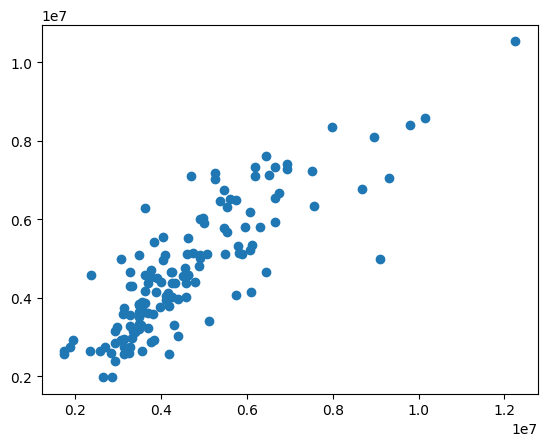

In [32]:
plt.scatter(Y_test, Y_pred)
plt.show

#### SIMPLE REGRESSION

In [33]:
X_train = df.iloc[: , 1]

In [34]:
X_train

0      1.046726
1      1.757010
2      2.218232
3      1.083624
4      1.046726
         ...   
540   -0.991879
541   -1.268613
542   -0.705921
543   -1.033389
544   -0.599839
Name: area, Length: 545, dtype: float64

In [35]:
Y_train

498    2660000
531    2233000
532    2135000
278    4277000
101    6230000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 408, dtype: int64

In [36]:
X_train , X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.25, random_state=0)

In [37]:
model.fit(X_train,Y_train)

LinearRegression()

In [38]:
X_train.shape

(408, 12)

In [39]:
X_test.shape

(137, 12)

In [40]:
Y_pred.shape

(137,)

In [41]:
Y_test.shape

(137,)

In [42]:
Y_train.shape

(408,)

In [43]:
Y_pred = model.predict(X_test)  

In [44]:
Y_test

239     4585000
113     6083000
325     4007500
66      6930000
479     2940000
         ...   
319     4060000
525     2345000
245     4550000
7      10150000
375     3640000
Name: price, Length: 137, dtype: int64

In [45]:
Y_pred.shape

(137,)

In [46]:
r2_score(Y_test, Y_pred)     #used to evaluate the performane of linear regression model
                            #variation between predicted and actual value 

0.6965206541388427

In [47]:
X_train = df.iloc[: , 2]

In [48]:
X_train

0      4
1      4
2      3
3      4
4      4
      ..
540    2
541    3
542    2
543    3
544    3
Name: bedrooms, Length: 545, dtype: int64

In [49]:
Y_train

498    2660000
531    2233000
532    2135000
278    4277000
101    6230000
        ...   
70     6790000
277    4305000
9      9800000
359    3710000
192    5040000
Name: price, Length: 408, dtype: int64

In [50]:
Y_pred = model.predict(X_test)  

In [51]:
r2_score(Y_test, Y_pred)

0.6965206541388427

In [52]:
print(f"slope: {model.coef_}")

slope: [ 538842.86655276  131621.48785796  983171.15433842  438480.72793278
  503344.15362554  454928.50935337  339507.48021992 1211831.7896308
  867670.01883143  233050.98985419  654818.4212265  -235150.77300469]


In [53]:
print(f"intercept: {model.intercept_}")

intercept: 1308909.540511631


### MEAN SQUARED ERROR

In [54]:
mean_squared_error(Y_test, Y_pred)

936684599757.6571